From `https://machinelearningmastery.com/handle-missing-data-python/`

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#from https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [2]:
#first row is data (not header)
df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Make the dataset a little more readable ##

In [3]:
'''
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
'''
df.rename(columns={0:'times_preg', 1:'plasma_glucose', 2:'blood_pressure', 3:'skin_thickness', 4:'serum_insulin', \
                   5:'bmi', 6:'pedigree_fn', 7:'age', 8:'result'}, inplace=True)
df.head()

,times_preg,plasma_glucose,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_fn,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explore the dataset a little bit #

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   times_preg      768 non-null    int64  
 1   plasma_glucose  768 non-null    int64  
 2   blood_pressure  768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   serum_insulin   768 non-null    int64  
 5   bmi             768 non-null    float64
 6   pedigree_fn     768 non-null    float64
 7   age             768 non-null    int64  
 8   result          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

times_preg        0
plasma_glucose    0
blood_pressure    0
skin_thickness    0
serum_insulin     0
bmi               0
pedigree_fn       0
age               0
result            0
dtype: int64

In [6]:
df.describe()

,times_preg,plasma_glucose,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_fn,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
df.head()

,times_preg,plasma_glucose,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_fn,age,result
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


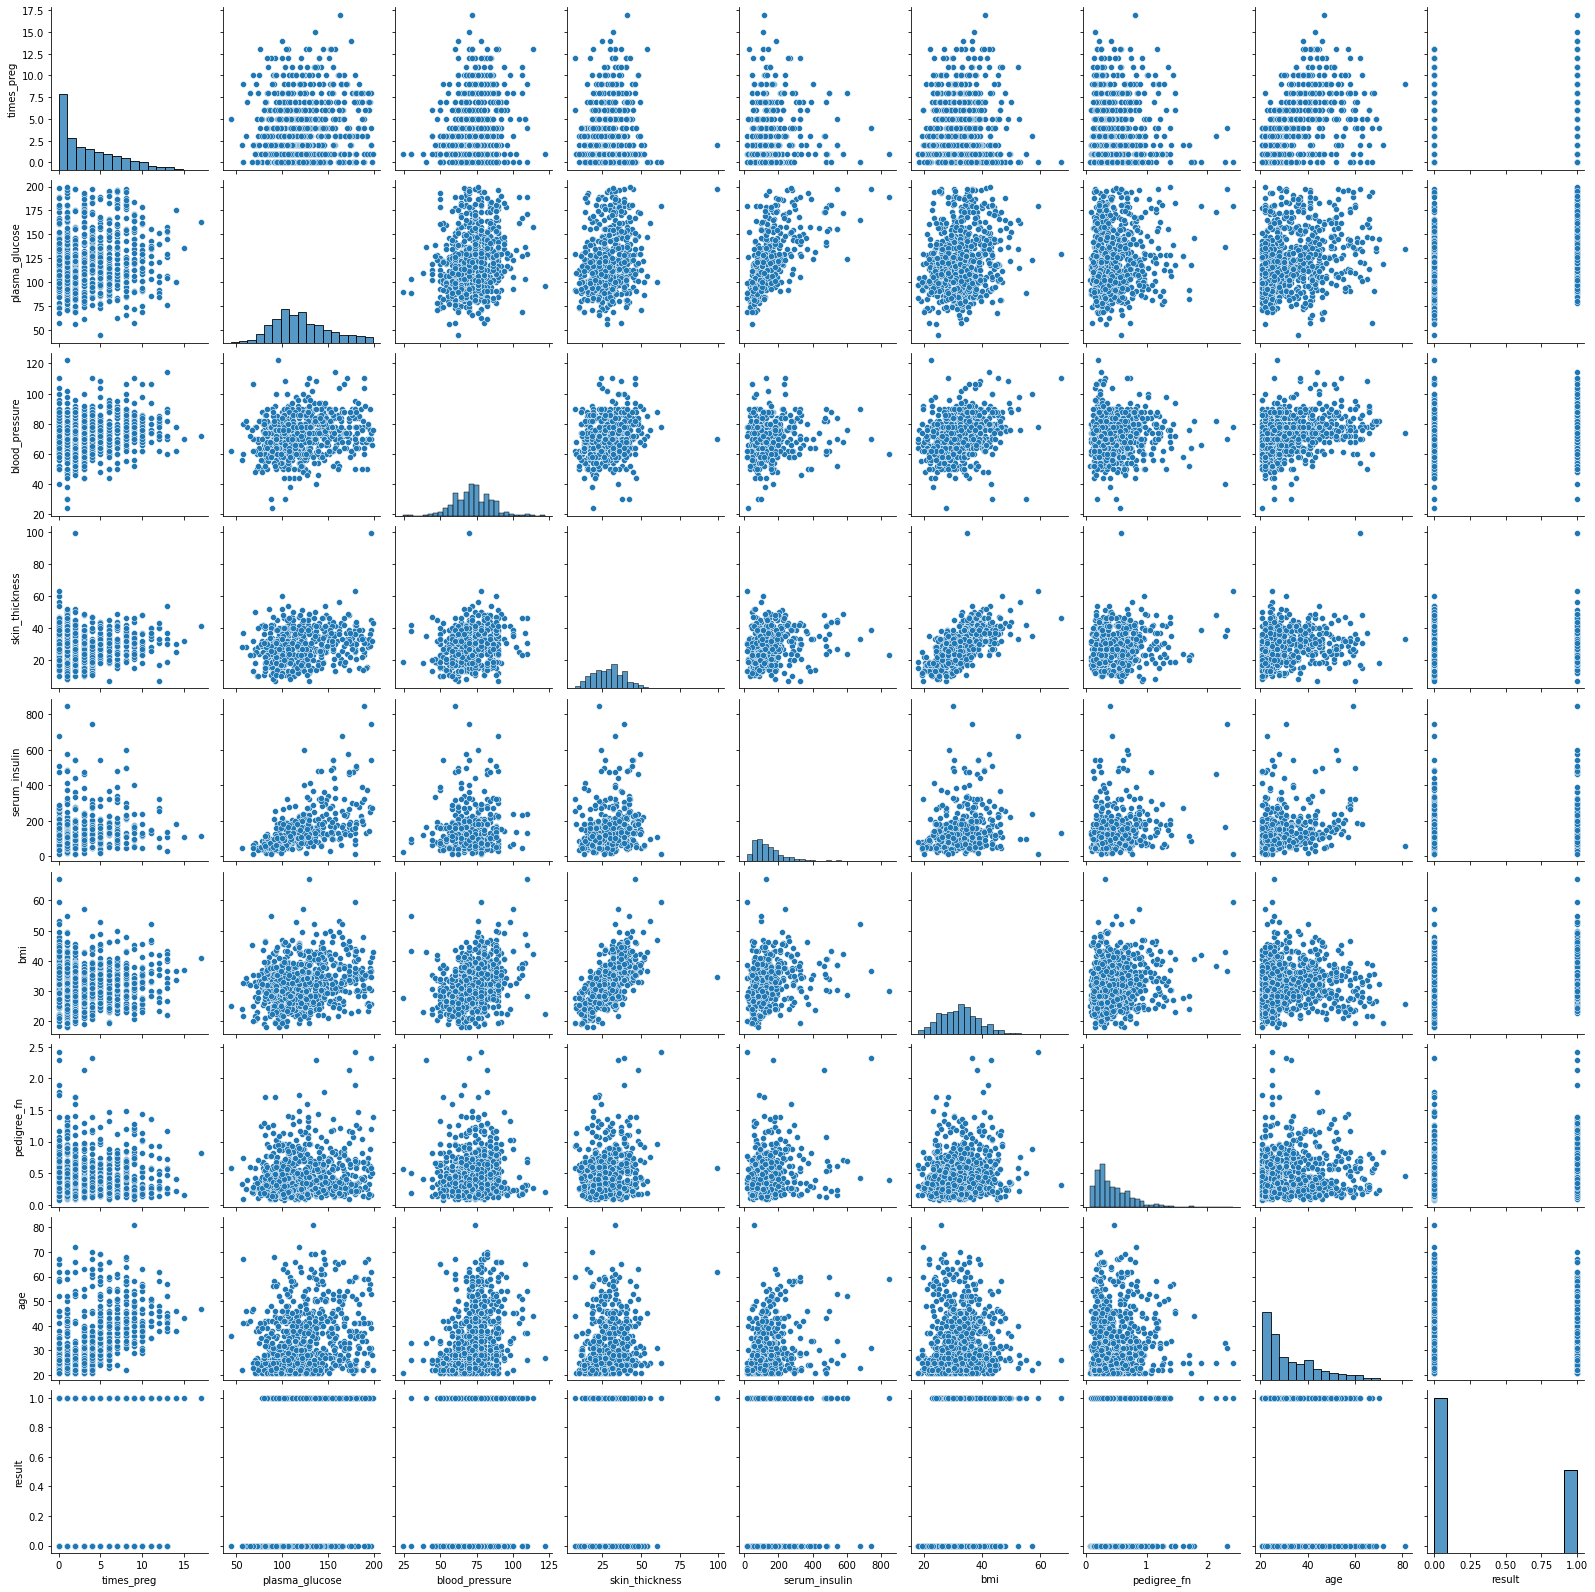

In [72]:
sns.pairplot(df)

# Start cleaning data #

## Zero does not make sense in these columns/features ##

-plasma_glucose <br/>
-blood_pressure <br/>
-skin_thickness <br/>
-serum_insulin <br/>
-bmi

In [8]:
selected_columns = ['plasma_glucose', 'blood_pressure', 'skin_thickness', 'serum_insulin', 'bmi']
num_missing = (df[selected_columns] == 0).sum()
print(num_missing)
print(f'Total Columns: {len(df)}')

plasma_glucose      5
blood_pressure     35
skin_thickness    227
serum_insulin     374
bmi                11
dtype: int64
Total Columns: 768


Mark the zeros/0 as NaN to they're not treated as actual integer values

In [9]:
df[selected_columns] = df[selected_columns].replace({0:np.nan})

In [10]:
print(df.isnull().sum())

times_preg          0
plasma_glucose      5
blood_pressure     35
skin_thickness    227
serum_insulin     374
bmi                11
pedigree_fn         0
age                 0
result              0
dtype: int64


In [11]:
df.shape

(768, 9)

### Try crude method of dropping all rows with null data and check results ###

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
df_drop = df.copy()
df_drop.dropna(inplace=True)
df_values = df_drop.values

df_drop.shape

(392, 9)

In [14]:
X = df_values[:,0:8]
X.shape

(392, 8)

In [15]:
y = df_values[:,8]
y.shape

(392,)

### LinearDiscriminantAnalysis ###

In [16]:
# define the model
lda_model = LinearDiscriminantAnalysis()

# define the model evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the model
lda_result = cross_val_score(lda_model, X, y, cv=cv, scoring='accuracy')
lda_accuracy = round(lda_result.mean(), 3)
# report the mean performance
print(f'lda_accuracy: {lda_accuracy*100}%')

lda_accuracy: 78.3%


### LogisticRegression ### 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
# define the model
log_model = LogisticRegression(max_iter=1000)

# define the model evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the model
log_result = cross_val_score(log_model, X, y, cv=cv, scoring='accuracy')
log_accuracy = round(log_result.mean(), 3)
# report the mean performance
print(f'log_accuracy: {log_accuracy*100}%')

log_accuracy: 77.60000000000001%


## Normalize/Standardize data and test our accuracy again ##

In [19]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
standardize_df = df_drop.copy()
standardize_df.head()

,times_preg,plasma_glucose,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_fn,age,result
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


**times_preg normalization**

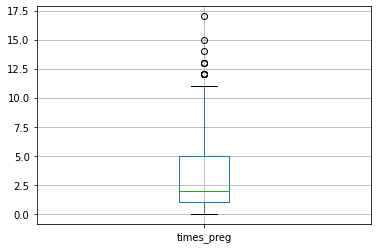

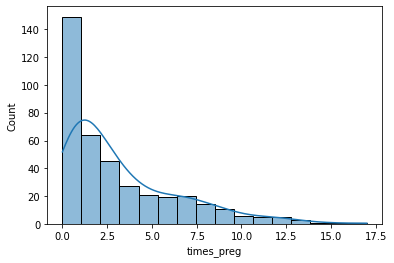

In [21]:
standardize_df[['times_preg']].boxplot();
plt.show()
sns.histplot(standardize_df['times_preg'], kde=True);
plt.show()

In [22]:
times_preg_scaler = RobustScaler()
times_preg_scaler.fit(standardize_df[['times_preg']])

standardize_df['times_preg_robust_scaler'] = times_preg_scaler.transform(standardize_df[['times_preg']])
standardize_df[['times_preg_robust_scaler', 'times_preg']]

,times_preg_robust_scaler,times_preg
3,-0.25,1
4,-0.50,0
6,0.25,3
8,0.00,2
13,-0.25,1
...,...,...
753,-0.50,0
755,-0.25,1
760,0.00,2
763,2.00,10


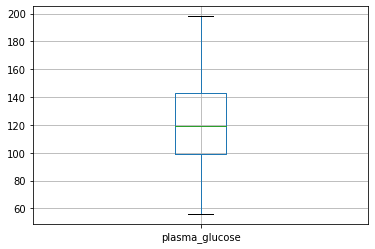

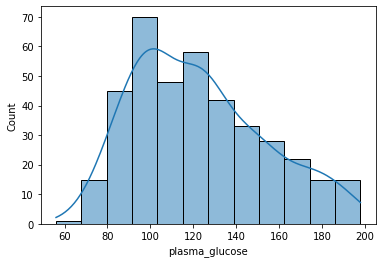

In [23]:
standardize_df[['plasma_glucose']].boxplot();
plt.show()
sns.histplot(standardize_df['plasma_glucose'], kde=True);
plt.show()

In [24]:
plasma_glucose_scaler = StandardScaler()
plasma_glucose_scaler.fit(standardize_df[['plasma_glucose']])

standardize_df['plasma_glucose_standard_scaler'] = plasma_glucose_scaler.transform(standardize_df[['plasma_glucose']])
standardize_df[['plasma_glucose_standard_scaler', 'plasma_glucose']]

,plasma_glucose_standard_scaler,plasma_glucose
3,-1.091046,89.0
4,0.466314,137.0
6,-1.447941,78.0
8,2.413014,197.0
13,2.153454,189.0
...,...,...
753,1.893894,181.0
755,0.174309,128.0
760,-1.123491,88.0
763,-0.701706,101.0


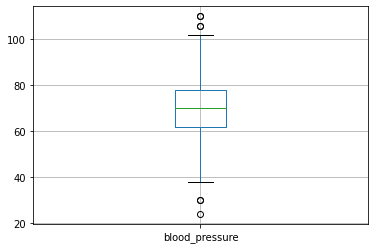

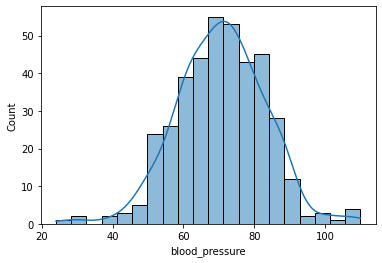

In [25]:
standardize_df[['blood_pressure']].boxplot();
plt.show()
sns.histplot(standardize_df['blood_pressure'], kde=True);
plt.show()

In [26]:
blood_pressure_scaler = RobustScaler()
blood_pressure_scaler.fit(standardize_df[['blood_pressure']])

standardize_df['blood_pressure_robust_scaler'] = blood_pressure_scaler.transform(standardize_df[['blood_pressure']])
standardize_df[['blood_pressure_robust_scaler', 'blood_pressure']]

,blood_pressure_robust_scaler,blood_pressure
3,-0.250,66.0
4,-1.875,40.0
6,-1.250,50.0
8,0.000,70.0
13,-0.625,60.0
...,...,...
753,1.125,88.0
755,1.125,88.0
760,-0.750,58.0
763,0.375,76.0


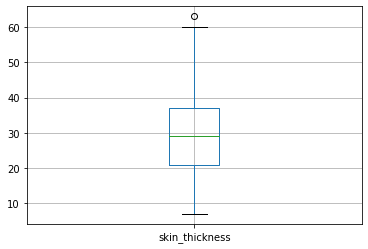

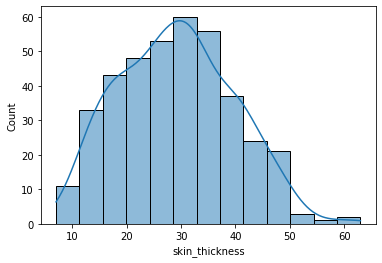

In [27]:
standardize_df[['skin_thickness']].boxplot();
plt.show()
sns.histplot(standardize_df['skin_thickness'], kde=True);
plt.show()

In [28]:
skin_thickness_scaler = RobustScaler()
skin_thickness_scaler.fit(standardize_df[['skin_thickness']])

standardize_df['skin_thickness_robust_scaler'] = skin_thickness_scaler.transform(standardize_df[['skin_thickness']])
standardize_df[['skin_thickness_robust_scaler', 'skin_thickness']]

,skin_thickness_robust_scaler,skin_thickness
3,-0.3750,23.0
4,0.3750,35.0
6,0.1875,32.0
8,1.0000,45.0
13,-0.3750,23.0
...,...,...
753,0.9375,44.0
755,0.6250,39.0
760,-0.1875,26.0
763,1.1875,48.0


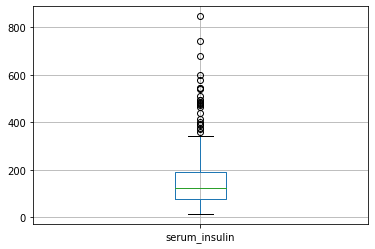

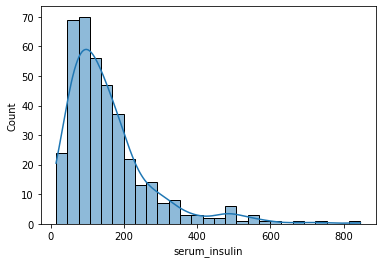

In [29]:
standardize_df[['serum_insulin']].boxplot();
plt.show()
sns.histplot(standardize_df['serum_insulin'], kde=True);
plt.show()


**First scale then normalize**

In [30]:
serum_insulin_scaler = RobustScaler()
serum_insulin_scaler.fit(standardize_df[['serum_insulin']])

standardize_df['serum_insulin_robust_scaler'] = serum_insulin_scaler.transform(standardize_df[['serum_insulin']])
standardize_df[['serum_insulin_robust_scaler', 'serum_insulin']]


,serum_insulin_robust_scaler,serum_insulin
3,-0.278146,94.0
4,0.375276,168.0
6,-0.331126,88.0
8,3.686534,543.0
13,6.362031,846.0
...,...,...
753,3.395143,510.0
755,-0.136865,110.0
760,-0.966887,16.0
763,0.481236,180.0


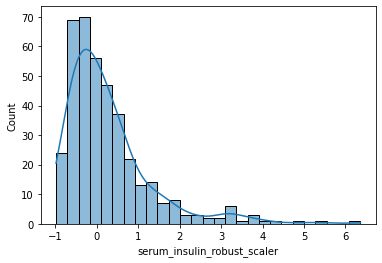

In [31]:
sns.histplot(standardize_df['serum_insulin_robust_scaler'], kde=True);

In [32]:
serum_insulin_min_max_scaler = MinMaxScaler()
serum_insulin_min_max_scaler.fit(standardize_df[['serum_insulin']])

standardize_df['serum_insulin_min_max_scaler'] = serum_insulin_min_max_scaler.transform(standardize_df[['serum_insulin']])
standardize_df[['serum_insulin_min_max_scaler', 'serum_insulin']]


,serum_insulin_min_max_scaler,serum_insulin
3,0.096154,94.0
4,0.185096,168.0
6,0.088942,88.0
8,0.635817,543.0
13,1.000000,846.0
...,...,...
753,0.596154,510.0
755,0.115385,110.0
760,0.002404,16.0
763,0.199519,180.0


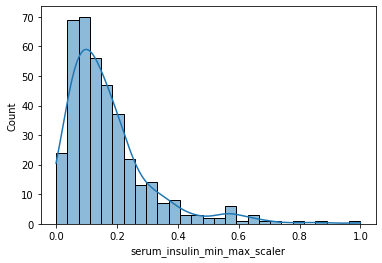

In [33]:
sns.histplot(standardize_df['serum_insulin_min_max_scaler'], kde=True);

/Users/dbd/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


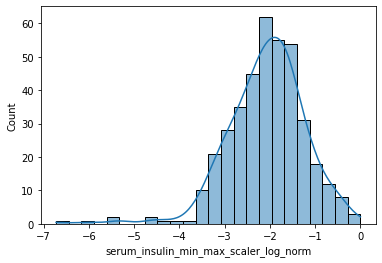

In [34]:
standardize_df['serum_insulin_min_max_scaler_log_norm'] = np.log(standardize_df['serum_insulin_min_max_scaler'])
sns.histplot(standardize_df['serum_insulin_min_max_scaler_log_norm'], kde=True);

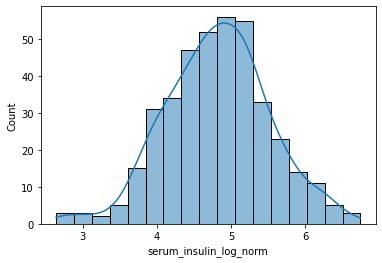

In [35]:
standardize_df['serum_insulin_log_norm'] = np.log(standardize_df['serum_insulin'])
sns.histplot(standardize_df['serum_insulin_log_norm'], kde=True);

<AxesSubplot:>

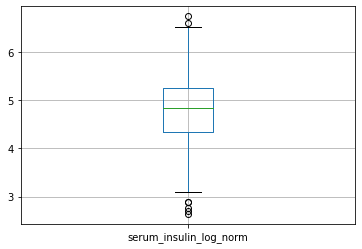

In [36]:
standardize_df[['serum_insulin_log_norm']].boxplot()

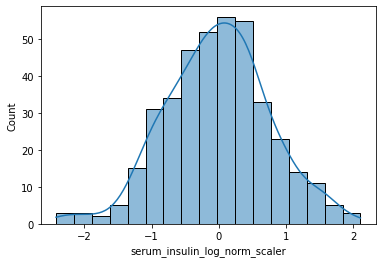

In [37]:
serum_insulin_log_norm_scaler = RobustScaler()
serum_insulin_log_norm_scaler.fit(standardize_df[['serum_insulin_log_norm']])

standardize_df['serum_insulin_log_norm_scaler'] = serum_insulin_log_norm_scaler.transform(standardize_df[['serum_insulin_log_norm']])
sns.histplot(standardize_df['serum_insulin_log_norm_scaler'], kde=True);


## USE THIS ONE FOR SERUM INSULIN ##

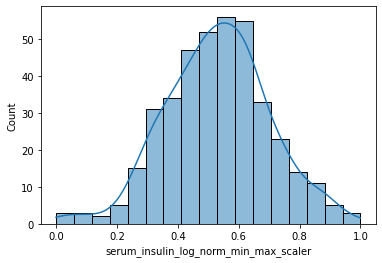

In [38]:
serum_insulin_log_norm_min_max_scaler = MinMaxScaler()
serum_insulin_log_norm_min_max_scaler.fit(standardize_df[['serum_insulin_log_norm']])

standardize_df['serum_insulin_log_norm_min_max_scaler'] = serum_insulin_log_norm_min_max_scaler.transform(standardize_df[['serum_insulin_log_norm']])
sns.histplot(standardize_df['serum_insulin_log_norm_min_max_scaler'], kde=True);

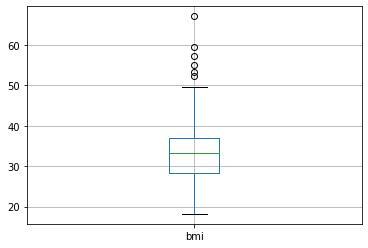

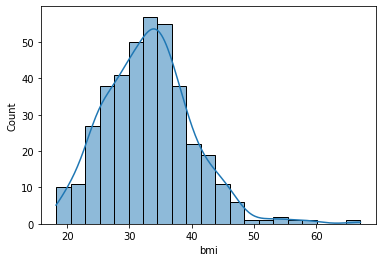

In [39]:
standardize_df[['bmi']].boxplot();
plt.show()
sns.histplot(standardize_df['bmi'], kde=True);
plt.show()

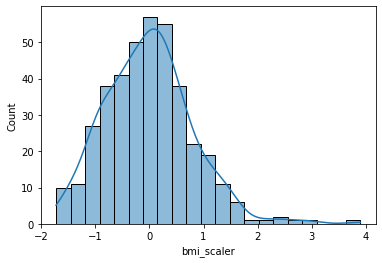

In [40]:
bmi_robust_scaler = RobustScaler()
bmi_robust_scaler.fit(standardize_df[['bmi']])

standardize_df['bmi_scaler'] = bmi_robust_scaler.transform(standardize_df[['bmi']])
sns.histplot(standardize_df['bmi_scaler'], kde=True);


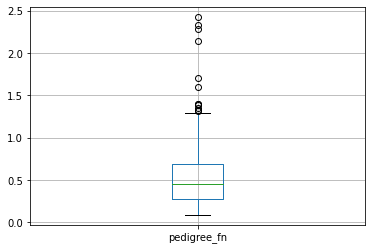

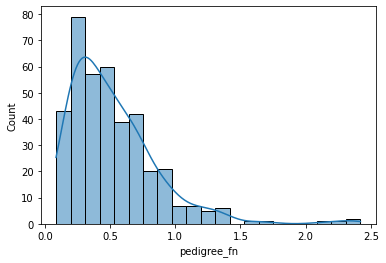

In [41]:
standardize_df[['pedigree_fn']].boxplot();
plt.show()
sns.histplot(standardize_df['pedigree_fn'], kde=True);
plt.show()


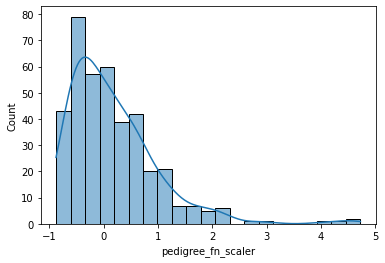

In [42]:
pedigree_fn_robust_scaler = RobustScaler()
pedigree_fn_robust_scaler.fit(standardize_df[['pedigree_fn']])

standardize_df['pedigree_fn_scaler'] = pedigree_fn_robust_scaler.transform(standardize_df[['pedigree_fn']])
sns.histplot(standardize_df['pedigree_fn_scaler'], kde=True);

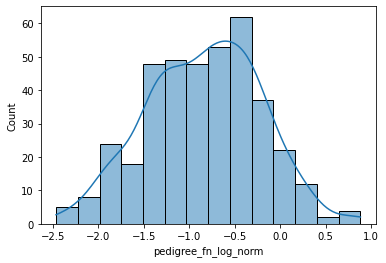

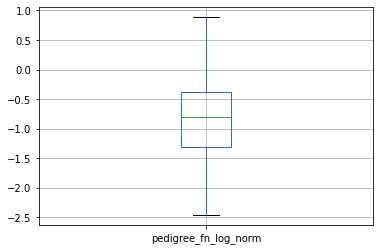

In [43]:
standardize_df['pedigree_fn_log_norm'] = np.log(standardize_df['pedigree_fn'])
sns.histplot(standardize_df['pedigree_fn_log_norm'], kde=True);
plt.show()
standardize_df[['pedigree_fn_log_norm']].boxplot()
plt.show()

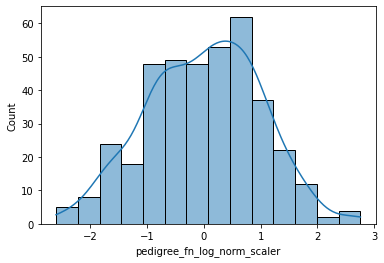

In [44]:
pedigree_fn_log_norm_standard_scaler = StandardScaler()
pedigree_fn_log_norm_standard_scaler.fit(standardize_df[['pedigree_fn_log_norm']])

standardize_df['pedigree_fn_log_norm_scaler'] = pedigree_fn_log_norm_standard_scaler.transform(standardize_df[['pedigree_fn_log_norm']])
sns.histplot(standardize_df['pedigree_fn_log_norm_scaler'], kde=True);


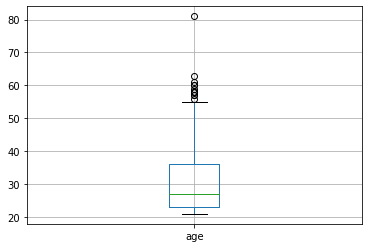

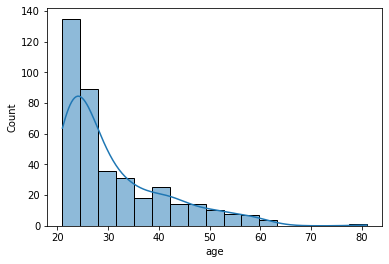

In [45]:
standardize_df[['age']].boxplot();
plt.show()
sns.histplot(standardize_df['age'], kde=True);
plt.show()

In [46]:
standardize_df[['age']].skew()

age    1.403607
dtype: float64

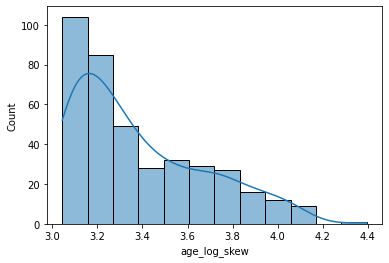

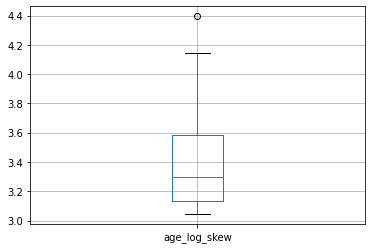

In [47]:
standardize_df['age_log_skew'] = np.log(standardize_df['age'])
sns.histplot(standardize_df['age_log_skew'], kde=True);
plt.show()
standardize_df[['age_log_skew']].boxplot()
plt.show()

In [48]:
standardize_df[['age_log_skew']].skew()

age_log_skew    0.855685
dtype: float64

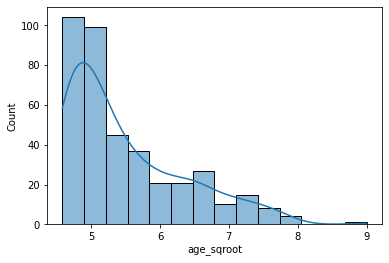

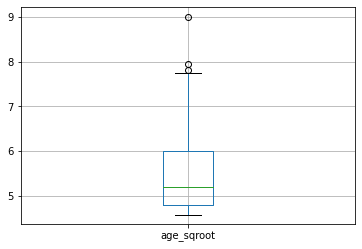

In [49]:


standardize_df['age_sqroot'] = np.sqrt(standardize_df['age'])
sns.histplot(standardize_df['age_sqroot'], kde=True);
plt.show()
standardize_df[['age_sqroot']].boxplot()
plt.show()

In [50]:
standardize_df[['age_sqroot']].skew()

age_sqroot    1.105816
dtype: float64

# Use THIS for age #

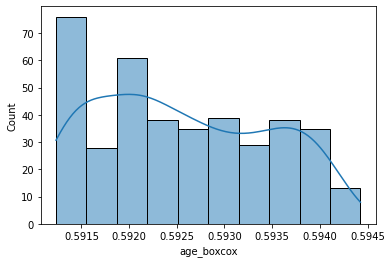

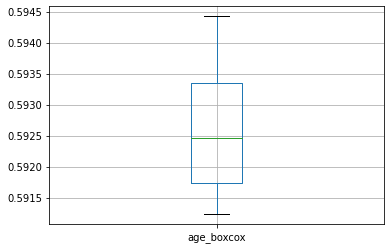

In [51]:
from scipy import stats
standardize_df['age_boxcox'] = stats.boxcox(standardize_df['age'])[0]
sns.histplot(standardize_df['age_boxcox'], kde=True);
plt.show()
standardize_df[['age_boxcox']].boxplot()
plt.show()

In [52]:
standardize_df[['age_boxcox']].skew()

age_boxcox    0.210831
dtype: float64

In [53]:
age_boxcox_scaler = StandardScaler()
age_boxcox_scaler.fit(standardize_df[['age_boxcox']])

standardize_df['age_boxcox_scaler'] = age_boxcox_scaler.transform(standardize_df[['age_boxcox']])
standardize_df[['age_boxcox_scaler', 'age_boxcox']]

,age_boxcox_scaler,age_boxcox
3,-1.484429,0.591234
4,0.634773,0.593129
6,-0.283363,0.592308
8,1.657291,0.594043
13,1.795811,0.594167
...,...,...
753,-0.283363,0.592308
755,0.960612,0.593420
760,-1.184909,0.591502
763,1.869018,0.594232


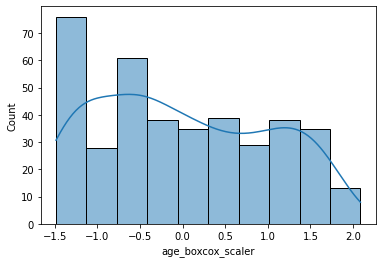

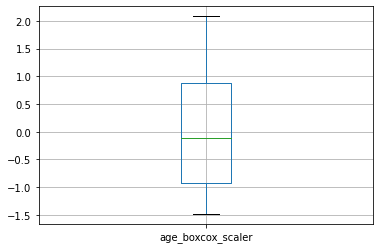

In [54]:
sns.histplot(standardize_df['age_boxcox_scaler'], kde=True);
plt.show()
standardize_df[['age_boxcox_scaler']].boxplot()
plt.show()

### Check all the skew values

In [55]:
standardize_df.columns

Index(['times_preg', 'plasma_glucose', 'blood_pressure', 'skin_thickness',
       'serum_insulin', 'bmi', 'pedigree_fn', 'age', 'result',
       'times_preg_robust_scaler', 'plasma_glucose_standard_scaler',
       'blood_pressure_robust_scaler', 'skin_thickness_robust_scaler',
       'serum_insulin_robust_scaler', 'serum_insulin_min_max_scaler',
       'serum_insulin_min_max_scaler_log_norm', 'serum_insulin_log_norm',
       'serum_insulin_log_norm_scaler',
       'serum_insulin_log_norm_min_max_scaler', 'bmi_scaler',
       'pedigree_fn_scaler', 'pedigree_fn_log_norm',
       'pedigree_fn_log_norm_scaler', 'age_log_skew', 'age_sqroot',
       'age_boxcox', 'age_boxcox_scaler'],
      dtype='object')

In [56]:
selected_columns = ['times_preg_robust_scaler', 'plasma_glucose_standard_scaler', 'blood_pressure_robust_scaler', \
                    'skin_thickness_robust_scaler', 'serum_insulin_log_norm_min_max_scaler', 'bmi_scaler', \
                    'pedigree_fn_log_norm_scaler', 'age_boxcox_scaler']
standardize_df[selected_columns].skew()



times_preg_robust_scaler                 1.335596
plasma_glucose_standard_scaler           0.517850
blood_pressure_robust_scaler            -0.087516
skin_thickness_robust_scaler             0.209311
serum_insulin_log_norm_min_max_scaler   -0.102772
bmi_scaler                               0.663485
pedigree_fn_log_norm_scaler             -0.074043
age_boxcox_scaler                        0.210831
dtype: float64

In [57]:
X = standardize_df[selected_columns].values

# define the model
lda_model = LinearDiscriminantAnalysis()

# define the model evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the model
lda_result = cross_val_score(lda_model, X, y, cv=cv, scoring='accuracy')
lda_accuracy = round(lda_result.mean(), 3)
# report the mean performance
print(f'lda_accuracy: {lda_accuracy*100}%')

lda_accuracy: 78.3%


In [58]:
X

array([[-0.25      , -1.09104581, -0.25      , ..., -0.5862069 ,
        -1.52075215, -1.48442939],
       [-0.5       ,  0.46631407, -1.875     , ...,  1.13793103,
         2.66649187,  0.63477294],
       [ 0.25      , -1.44794079, -1.25      , ..., -0.25287356,
        -0.88815586, -0.28336274],
       ...,
       [ 0.        , -1.12349081, -0.75      , ..., -0.55172414,
         0.91596558, -1.18490888],
       [ 2.        , -0.70170584,  0.375     , ..., -0.03448276,
        -1.48288652,  1.86901774],
       [ 0.75      , -0.05280589,  0.125     , ..., -0.8045977 ,
        -0.90762565,  0.31115124]])

In [59]:
# define the model
log_model = LogisticRegression(max_iter=1000)

# define the model evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the model
log_result = cross_val_score(log_model, X, y, cv=cv, scoring='accuracy')
log_accuracy = round(log_result.mean(), 3)
# report the mean performance
print(f'log_accuracy: {log_accuracy*100}%')

log_accuracy: 78.8%


# Look at colinearity

<AxesSubplot:>

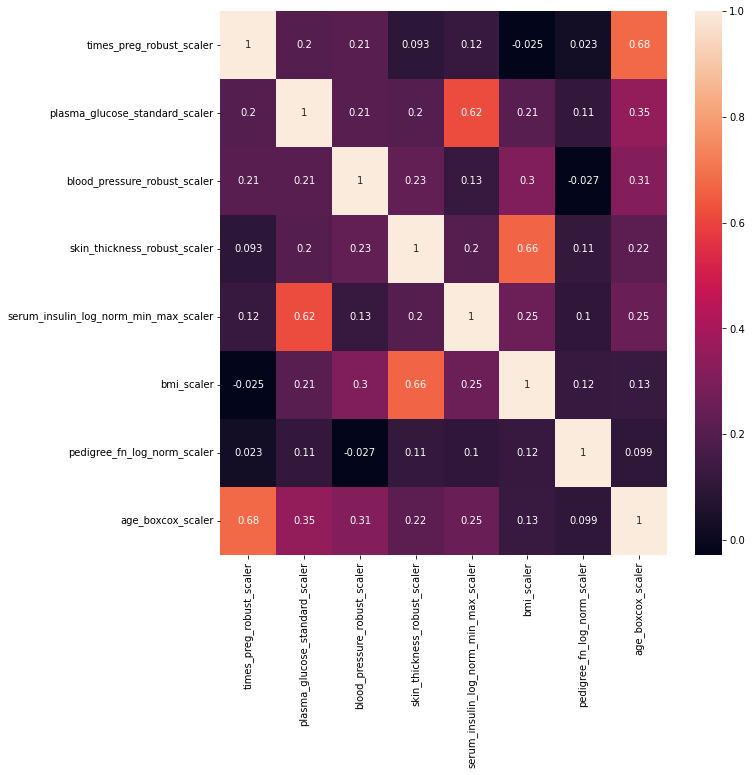

In [60]:
plt.figure(figsize = (10,10))
sns.heatmap(standardize_df[selected_columns].corr(), annot=True)

In [61]:
formula = "result ~ " + ' + '.join(selected_columns)
formula

'result ~ times_preg_robust_scaler + plasma_glucose_standard_scaler + blood_pressure_robust_scaler + skin_thickness_robust_scaler + serum_insulin_log_norm_min_max_scaler + bmi_scaler + pedigree_fn_log_norm_scaler + age_boxcox_scaler'

In [62]:
import statsmodels.formula.api as smf
ols_model = smf.ols(formula = formula, data = standardize_df).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     26.71
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           7.72e-33
Time:                        08:07:33   Log-Likelihood:                -174.03
No. Observations:                 392   AIC:                             366.1
Df Residuals:                     383   BIC:                             401.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [65]:
corr = standardize_df[selected_columns].corr()
corr_df = corr.unstack().reset_index()

corr_df.columns = ['feature 1', 'feature 2', 'correlation']
corr_df.sort_values(by='correlation', ascending=False, inplace=True)
corr_df = corr_df[corr_df['feature 1'] != corr_df['feature 2']]
corr_df.head(20)

,feature 1,feature 2,correlation
56,age_boxcox_scaler,times_preg_robust_scaler,0.678580
7,times_preg_robust_scaler,age_boxcox_scaler,0.678580
43,bmi_scaler,skin_thickness_robust_scaler,0.664355
29,skin_thickness_robust_scaler,bmi_scaler,0.664355
33,serum_insulin_log_norm_min_max_scaler,plasma_glucose_standard_scaler,0.616754
12,plasma_glucose_standard_scaler,serum_insulin_log_norm_min_max_scaler,0.616754
57,age_boxcox_scaler,plasma_glucose_standard_scaler,0.350094
15,plasma_glucose_standard_scaler,age_boxcox_scaler,0.350094
58,age_boxcox_scaler,blood_pressure_robust_scaler,0.314162
23,blood_pressure_robust_scaler,age_boxcox_scaler,0.314162


In [69]:
vif_df = calculate_vif(standardize_df, selected_columns)
vif_df

,VIF,Tolerance
times_preg_robust_scaler,1.908794,0.523891
plasma_glucose_standard_scaler,1.752788,0.570520
blood_pressure_robust_scaler,1.230003,0.813006
skin_thickness_robust_scaler,1.857308,0.538414
serum_insulin_log_norm_min_max_scaler,1.668382,0.599383
bmi_scaler,1.990098,0.502488
pedigree_fn_log_norm_scaler,1.040669,0.960921
age_boxcox_scaler,2.178046,0.459127


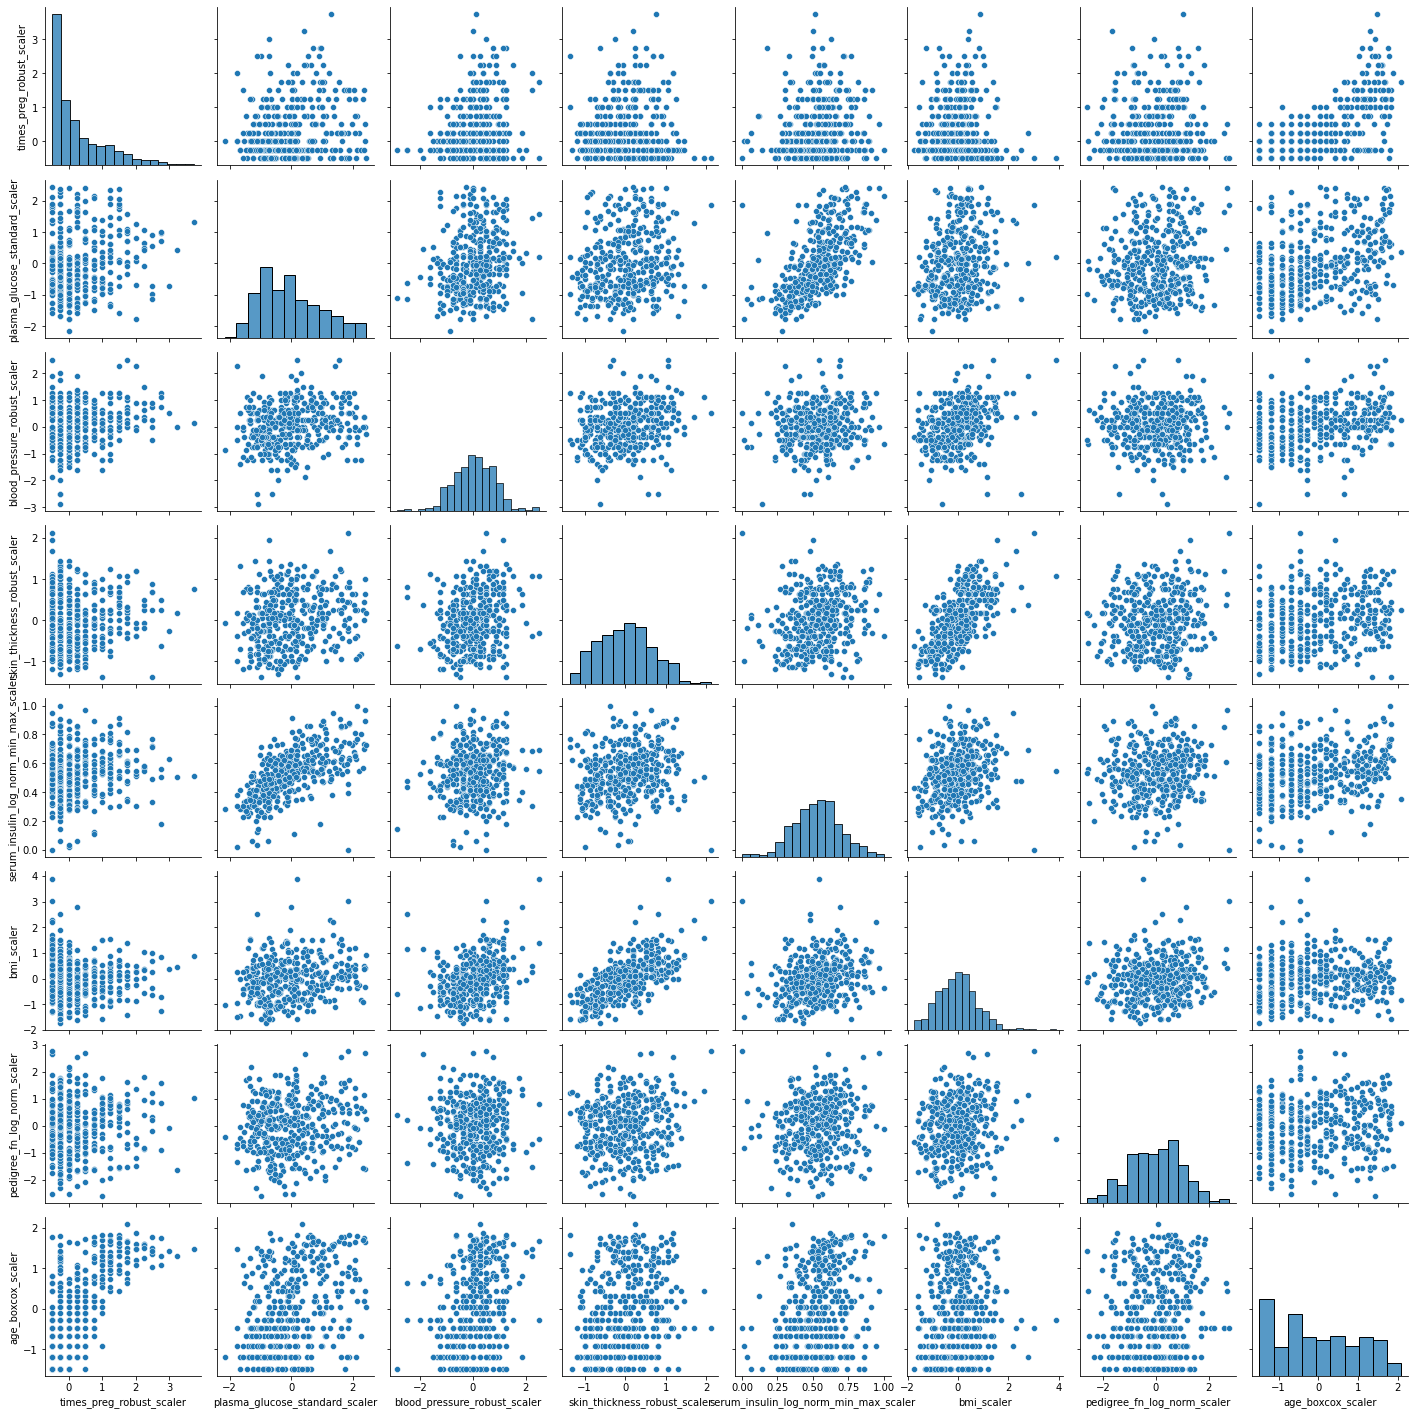

In [70]:
sns.pairplot(standardize_df[selected_columns])